# LIST5

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

Below is the code for q-voter model in the 'situation' case.

In [ ]:
def q_voter(G: nx.Graph,p: float,f: float,q: int,steps: int):
    #SETTING UP RANDOM OPINIONS ON THE NETWORK
    op_up=[n for n in G.nodes()]
    states_up={node:1 for node in op_up}
    
    nx.set_node_attributes(G,states_up,"state")
    
    mags=[1] #magnetization
    for step in range(steps):
        for i in range(len(G)):
            S_i=random.sample(G.nodes,1)[0]
            
            x=np.random.uniform()
            
            if x<p:#if agent is acting independantly
                y=np.random.uniform()
                if y<f:
                    if G.nodes[S_i]['state']==1:
                        G.nodes[S_i]['state']=0
                    elif G.nodes[S_i]['state']==0:
                        G.nodes[S_i]['state']=1
            else:
                #changing the state based on unanimous decision
                neighbors=[i for i in nx.neighbors(G,S_i)]
                if len(neighbors)>=q:
                    q_panel=random.sample(neighbors, q)
                    panel_opinion=[G.nodes[n]['state'] for n in q_panel]
                    if np.abs(sum(panel_opinion))==q:
                        #print(G.nodes[q_panel[0]]['state'])
                        G.nodes[S_i]['state']=G.nodes[q_panel[0]]['state']

        general_opinion=[G.nodes[n]['state'] for n in G.nodes()]
        
        mags.append(sum(general_opinion)/len(general_opinion))
    return mags

In [ ]:
A=nx.complete_graph(100)

In [ ]:
#q_voter(A,0.8,0.5,4,100)

Below we perform the simulations for 4 values of parameter f, over 20 values of parameter p. We average the concentration of opinion over a 1000 simulations.

In [ ]:
q=4
steps=100
fs=[0.2,0.3,0.4,0.5]
ps=np.arange(0,1,0.05)

res=[]
for f in fs:
    one_line=[]
    for p in ps:
        val=0
        for i in range(1000):
            val+=q_voter(A,p,f,q,100)[-1]
        one_line.append(val/1000)
    res.append(one_line)
 


/tmp/ipykernel_82/176420565.py:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  S_i=random.sample(G.nodes,1)[0]


In [ ]:
f_02=res[0]
f_03=res[1]
f_04=res[2]
f_05=res[3]

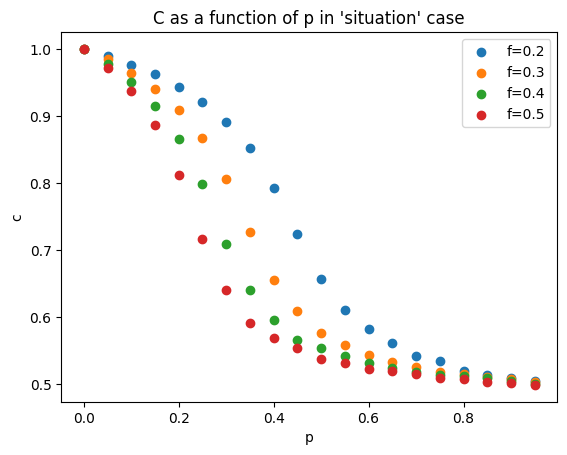

In [ ]:
plt.scatter(ps,f_02,label='f=0.2')
plt.scatter(ps,f_03,label='f=0.3')
plt.scatter(ps,f_04,label='f=0.4')
plt.scatter(ps,f_05,label='f=0.5')
plt.title("C as a function of p in 'situation' case")
plt.xlabel("p")
plt.ylabel("c")
plt.legend()
plt.show()

In the plot we can observe a similar behaviour as in the figure 2 from the article. As we increase the value of the f parameter, we can see that the value of C decreases faster for smaller values of p. (Probability of acting independately)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3ec5c87c-f518-4cc9-8f2b-953db59a48eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>